In [1]:
!pip install seaborn

In [2]:
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [3]:
df = pd.read_csv(os.path.join("AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#analyze the test variable
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

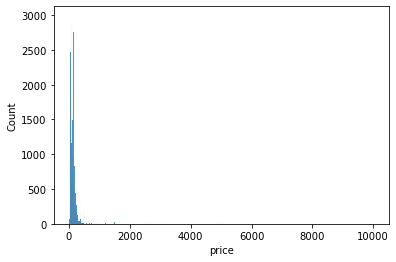

In [7]:
p1=sns.histplot(df["price"])

In [8]:
df.loc[df["price"]>1000].shape

(239, 16)

In [9]:
df=df[~(df["price"]>1000)]

In [10]:
df.shape

(48656, 16)

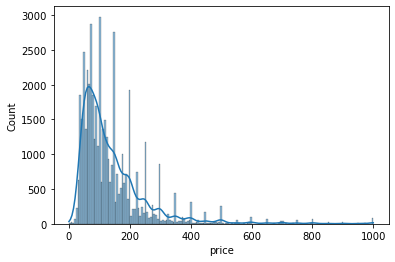

In [11]:
p2=sns.histplot(df["price"], kde=True)

In [12]:
df=df[~(df["price"]>250)]

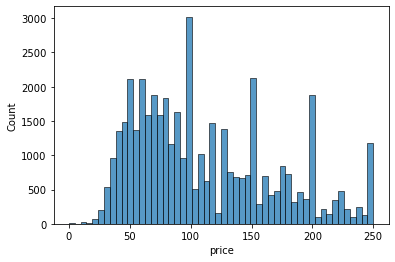

In [13]:
p3=sns.histplot(df["price"])

In [14]:
df.drop(["id", "name", "host_name","host_id","latitude", "longitude","neighbourhood","last_review"], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43687 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             43687 non-null  object 
 1   room_type                       43687 non-null  object 
 2   price                           43687 non-null  int64  
 3   minimum_nights                  43687 non-null  int64  
 4   number_of_reviews               43687 non-null  int64  
 5   reviews_per_month               35312 non-null  float64
 6   calculated_host_listings_count  43687 non-null  int64  
 7   availability_365                43687 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


In [16]:
df.fillna({"reviews_per_month":0}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43687 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             43687 non-null  object 
 1   room_type                       43687 non-null  object 
 2   price                           43687 non-null  int64  
 3   minimum_nights                  43687 non-null  int64  
 4   number_of_reviews               43687 non-null  int64  
 5   reviews_per_month               43687 non-null  float64
 6   calculated_host_listings_count  43687 non-null  int64  
 7   availability_365                43687 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


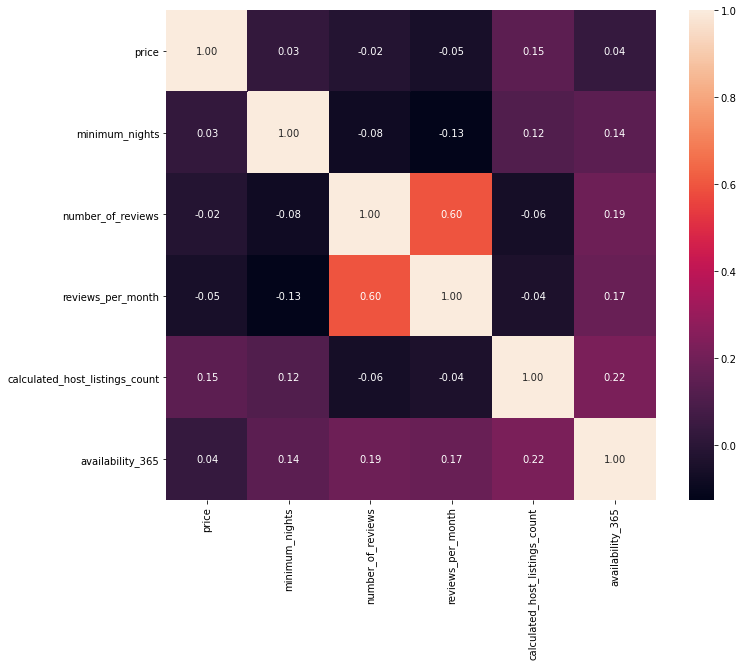

In [18]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12,9))
,
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=corr.columns, xticklabels=corr.columns)
plt.show()

In [19]:
df2=pd.get_dummies(df)

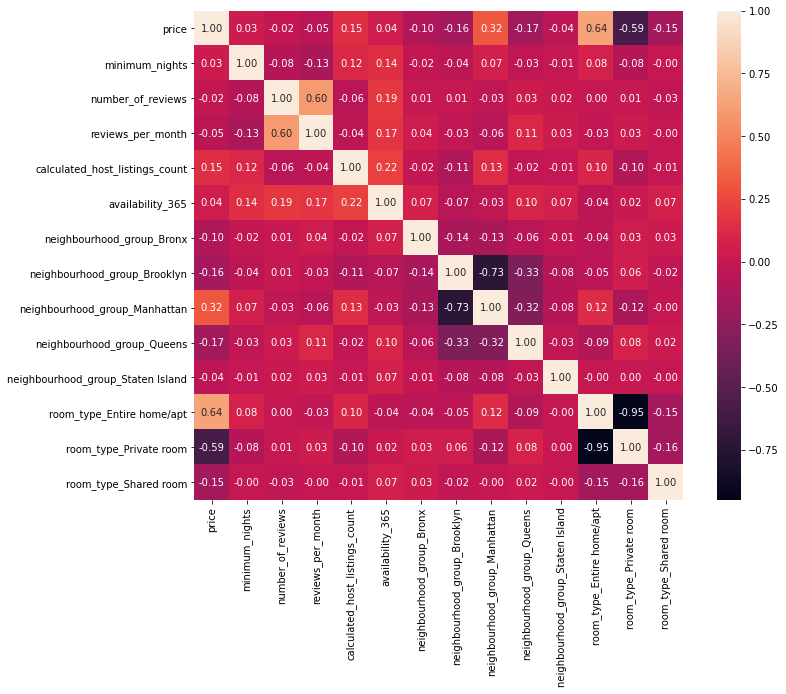

In [20]:
corr = df2.corr()
f, ax = plt.subplots(figsize=(12,9))
,
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=corr.columns, xticklabels=corr.columns)
plt.show()

In [21]:
X=df[["minimum_nights","number_of_reviews","reviews_per_month","neighbourhood_group","room_type","calculated_host_listings_count","availability_365"]]


In [22]:
X= pd.get_dummies(X)

In [23]:
y=df["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(43687, 13) (43687, 1)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [26]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [28]:
model=SVR(kernel='linear')

In [65]:
%%time

model.fit(X_train, y_train.ravel())


Wall time: 8min 9s


SVR(kernel='linear')

In [66]:
y_pred= model.predict(X_test_scaled)
y_pred

KeyboardInterrupt: 

In [ ]:
model.score(X_test_scaled, y_test_scaled)

In [ ]:
sns.histplot( y_test_scaled, color="blue", label="original")
sns.histplot(y_pred, color="red", label="predicted")
plt.legend()


In [30]:
# import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
# dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
# dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

In [32]:
# from sklearn.metrics import mean_squared_error


# # "Learn" the mean from the training data
# mean_train = np.mean(y_train_scaled)
# # Get predictions on the test set
# baseline_predictions = np.ones(y_test_scaled.shape) * mean_train
# # Compute MAE

# rmse = np.sqrt(mean_squared_error(y_test_scaled, baseline_predictions))
# print("Baseline RMSE: %f" % (rmse))

In [33]:
# params = {
#     # Parameters that we are going to tune.
#     'max_depth':4,
#     'min_child_weight':11,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'reg:squarederror',
# }

In [34]:
# params['eval_metric'] = "rmse"

In [35]:
# num_boost_round = 999

In [36]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")],
#     early_stopping_rounds=15
# )

In [37]:
# print("Best RMSE: {:.2f} with {} rounds".format(
#                  model.best_score,
#                  model.best_iteration+1))

In [38]:
# cv_results = xgb.cv(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     seed=42,
#     nfold=5,
#     metrics={'rmse'},
#     early_stopping_rounds=10
# )

# cv_results

In [39]:
# cv_results['test-rmse-mean'].min()

In [40]:
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(1,10)
#     for min_child_weight in range(5,12)
# ]

In [41]:
# %%time

# min_rmse = float("Inf")
# best_params = None
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#     # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'rmse'},
#         early_stopping_rounds=10
#     )
#     # Update best RMSE
#     mean_rmse = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (max_depth,min_child_weight)
# print("Best params: {}, {},RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [42]:
# params['max_depth'] = 6 
# params['min_child_weight'] = 11

In [43]:
# gridsearch_params = [
#     (subsample, colsample)
#     for subsample in [i/10. for i in range(5,10)]
#     for colsample in [i/10. for i in range(5,10)]
# ]

In [44]:
# %%time

# min_rmse = float("Inf")
# best_params = None
# # We start by the largest values and go down to the smallest
# for subsample, colsample in reversed(gridsearch_params):
#     print("CV with subsample={}, colsample={}".format(
#                              subsample,
#                              colsample))
#     # We update our parameters
#     params['subsample'] = subsample
#     params['colsample_bytree'] = colsample
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'rmse'},
#         early_stopping_rounds=10
#     )
#     # Update best score
#     mean_rmse = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (subsample,colsample)
# print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [45]:
# params['subsample'] = 0.8
# params['colsample_bytree'] = 0.7

In [46]:
# %%time

# min_rmse = float("Inf")
# best_params = None
# for eta in [0.5, 0.01, 0.02]:
#     print("CV with eta={}".format(eta))
#     # We update our parameters
#     params['eta'] = eta
#     # Run and CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'rmse'},
#         early_stopping_rounds=10
#     )
#     # Update best score
#     mean_rmse = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (subsample,colsample)
# print("Best params: {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [47]:
# params["eta"] = 0.5

In [48]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")],
#     early_stopping_rounds=10
# )

In [49]:
# print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

In [50]:
# num_boost_round = model.best_iteration + 1
# best_model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")]
# )

In [51]:
# np.sqrt(mean_squared_error(best_model.predict(dtest), y_test_scaled))

In [52]:
# best_model.save_model("my_model.model")

In [53]:
# loaded_model = xgb.Booster()
# loaded_model.load_model("my_model.model")

# y_pred =loaded_model.predict(dtest)
# print(f'true = {np.array(y_test_scaled)}')
# print(f'pred = {y_pred}')

In [54]:
# from xgboost import plot_importance, plot_tree
# plot_importance(loaded_model,ax=plt.gca(), ylabel=)

In [55]:
# sns.histplot(y_test_scaled, label="original")
# sns.histplot(y_pred, label="predicted",color = "yellow" )

# plt.legend()
# plt.show()